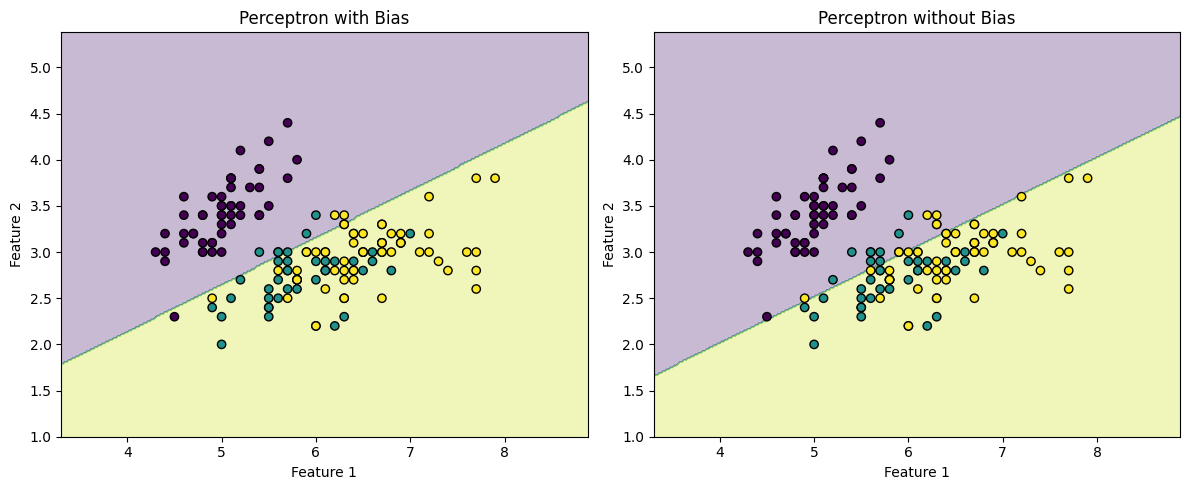

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron classification with bias
model_with_bias = Perceptron(penalty=None, fit_intercept=True, random_state=42)
model_with_bias.fit(X_train, y_train)

# Perceptron classification without bias
model_without_bias = Perceptron(penalty=None, fit_intercept=False, random_state=42)
model_without_bias.fit(X_train, y_train)

# Create a meshgrid for plotting decision boundaries
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02))

# Predict for each point in the meshgrid
Z_with_bias = model_with_bias.predict(np.c_[xx.ravel(), yy.ravel()])
Z_with_bias = Z_with_bias.reshape(xx.shape)

Z_without_bias = model_without_bias.predict(np.c_[xx.ravel(), yy.ravel()])
Z_without_bias = Z_without_bias.reshape(xx.shape)

# Scatterplot with decision boundaries
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_with_bias, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Perceptron with Bias")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_without_bias, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Perceptron without Bias")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [ ]:
# Predictions on the testing data
y_pred_with_bias = model_with_bias.predict(X_test)
y_pred_without_bias = model_without_bias.predict(X_test)

# Calculate accuracy scores
accuracy_with_bias = accuracy_score(y_test, y_pred_with_bias)
accuracy_without_bias = accuracy_score(y_test, y_pred_without_bias)

# Display accuracy scores
print("Accuracy with bias:", accuracy_with_bias)
print("Accuracy without bias:", accuracy_without_bias)


Accuracy with bias: 0.6333333333333333
Accuracy without bias: 0.5666666666666667
